# Salary Predictions Based on Job Descriptions

# DEFINE

### ---- 1 Defining the problem ----

How can we use job postings to predict salaries? 

Using data from historical job postings we will train a model to predict salaries.  This will allow recruiters to make more informed decisions when making and negotiating job offers. 

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
print('Libraries loaded')

#your info here
__author__ = "Kevin Moldovan"

Libraries loaded


## DISCOVER

### ---- 2 Loading the data ----

In [3]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')
test_features= pd.read_csv('data/test_features.csv')
print('CSVs loaded')

CSVs loaded


In [ ]:
#only for goolge colab - mounting google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#only for google colab - loading data
train_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train_features.csv')
train_salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train_salaries.csv')
test_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_features.csv')
print('CSVs loaded')

### ---- 3 Clean the data ---- 
Looking for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

#### Checking for duplicate data

In [30]:
print('train_features duplicates: ', train_features.duplicated().sum())
print('train_salaries duplicates: ', train_salaries.duplicated().sum())
print('test_features  duplicates: ', test_features.duplicated().sum())

train_features duplicates:  0
train_salaries duplicates:  0
test_features  duplicates:  0


#### Finding Corrupt Data

In [ ]:
#Looking for invalid/corrupt data in train_feature_df
train_feature_df.isnull().sum()

In [ ]:
#Looking for invalid/corrupt data in train_target_df
train_target_df.isnull().sum()

In [ ]:
#Looking for invalid/corrupt data in test_feature_df
test_feature_df.isnull().sum()

In [7]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [8]:
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [9]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [11]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [14]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [16]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [12]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [4]:
#Merging Train and Target DFs
train_df = pd.merge(train_features, train_salaries, on='jobId')

In [7]:
train8 = train_df[train_df.salary < 8.5].index
train8

Int64Index([30559, 495984, 652076, 816129, 828156], dtype='int64')

In [32]:
#Dropping zero salaries
train_df.drop(train_df[train_df.salary < 8.5].index, inplace = True)

In [33]:
train_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [9]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [10]:
#Generating descriptive statistics for for train_df numeric columns
train_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [12]:
#Generating descriptive statistics for train_df categorical columns
train_df.describe(exclude = [np.number])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685346707,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [13]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [ ]:
#Generating descriptive statistics for test_feature_df numeric columns
test_feature_df.describe()

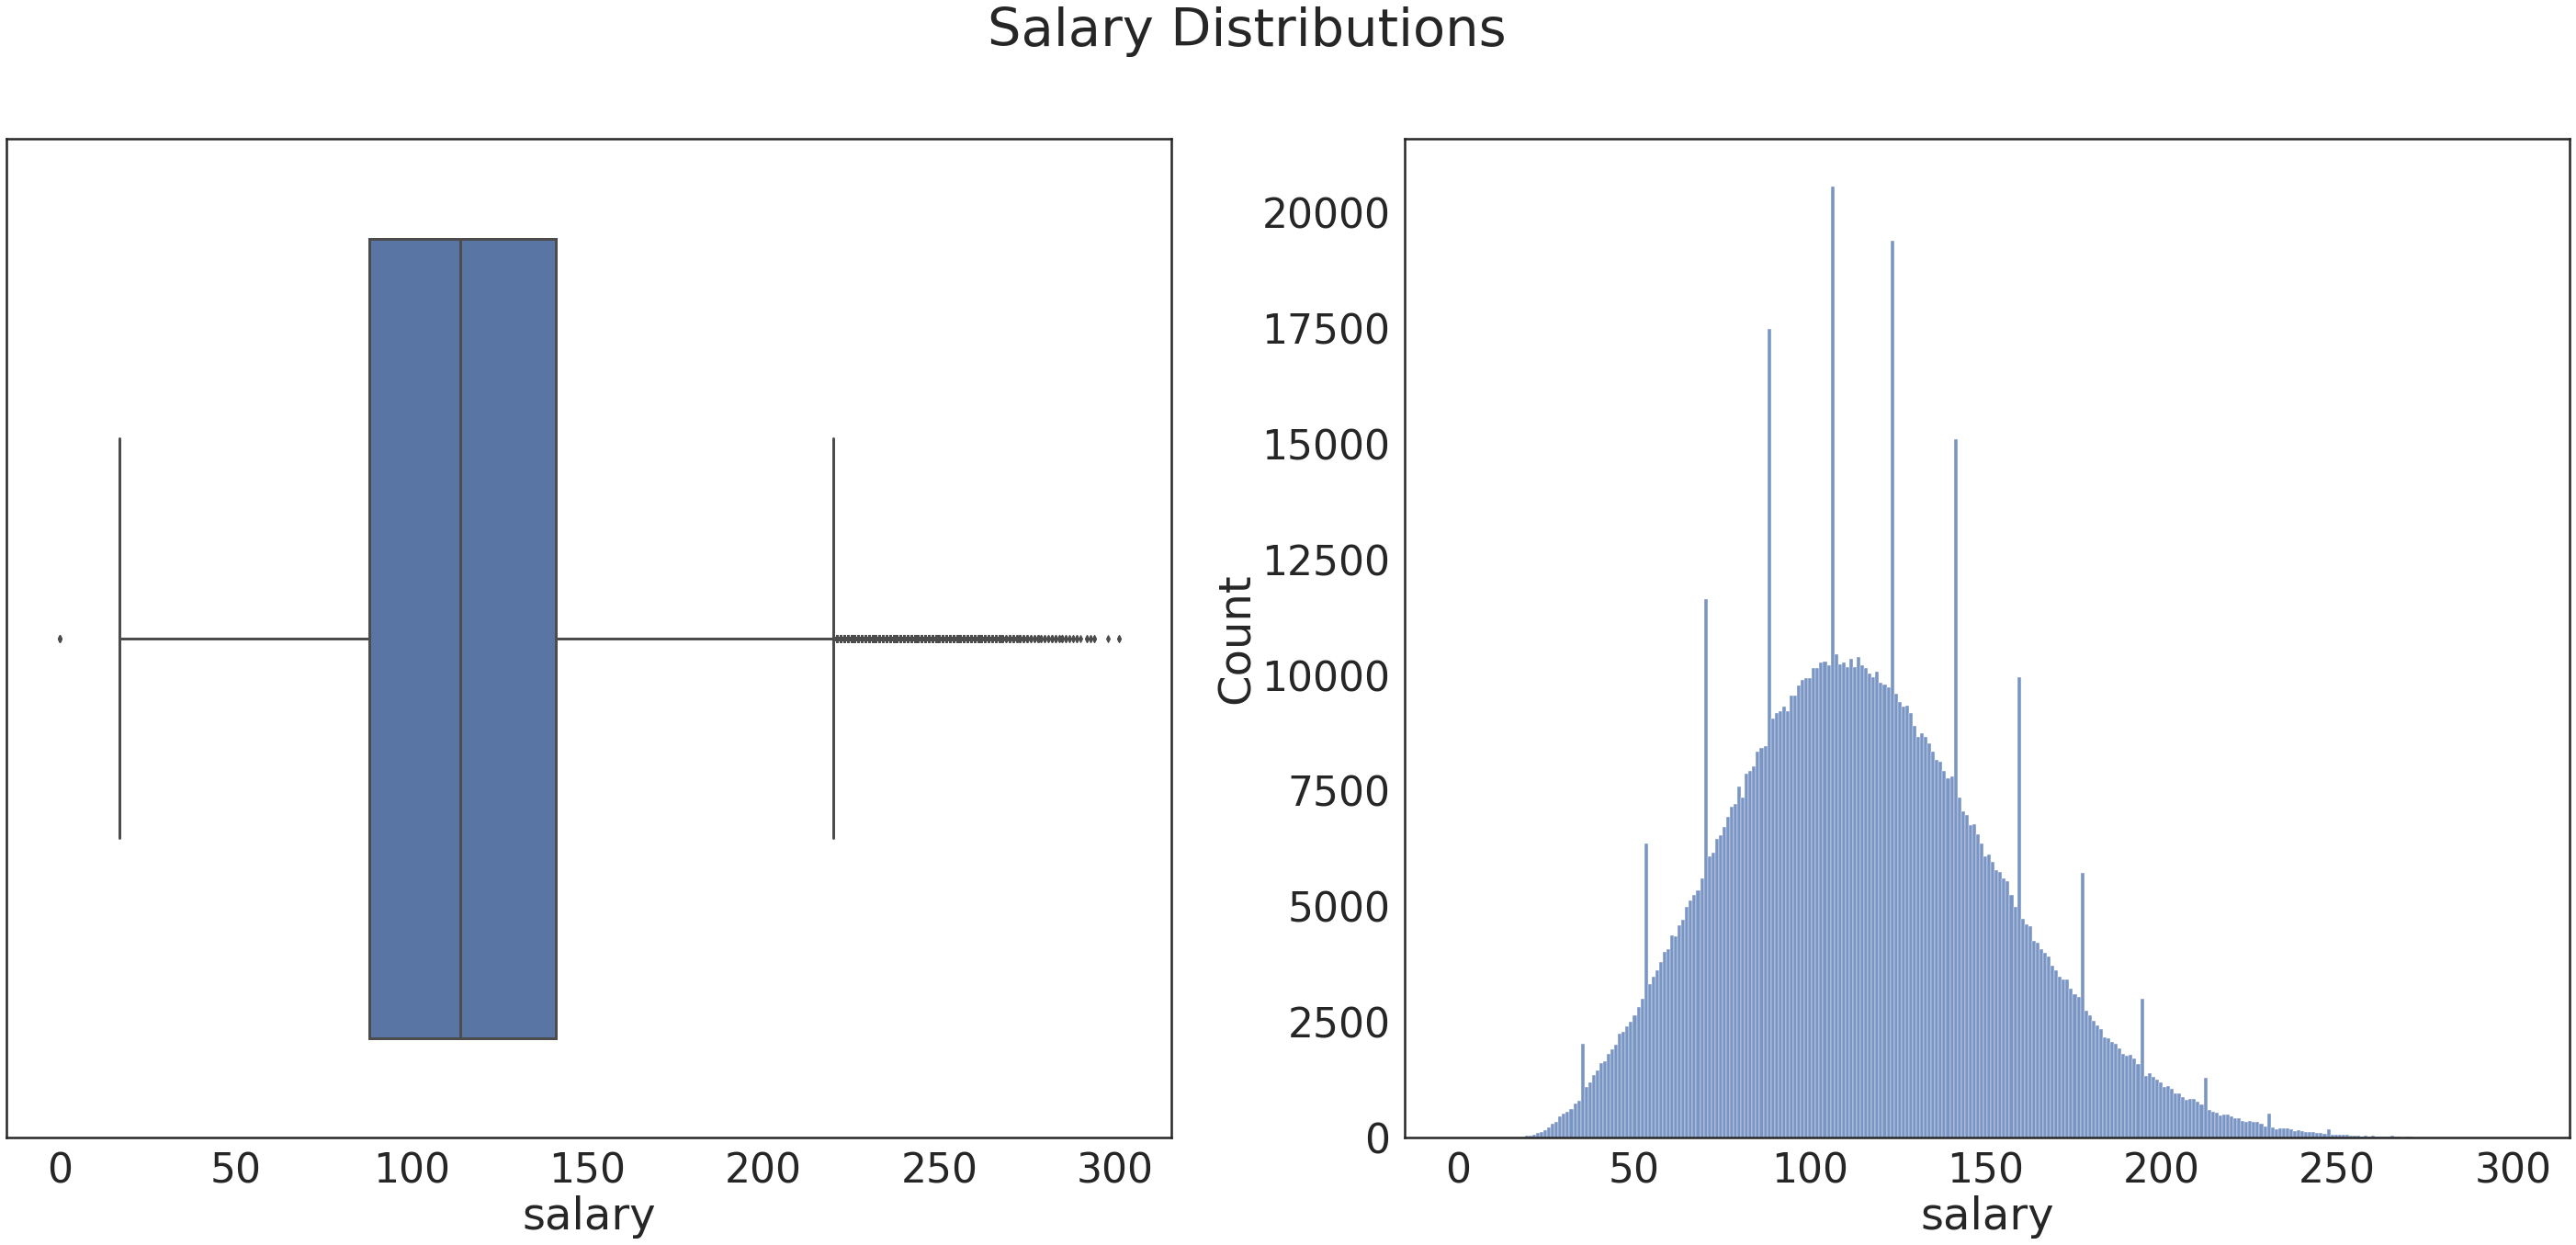

In [5]:
#visualizing salary distributions
sns.set(style='white')
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
plt.subplot(1,2,1)
sns.boxplot(x=train_df.salary) 
plt.subplot(1,2,2)
sns.histplot(x=train_df.salary)
plt.suptitle('Salary Distributions') 
plt.show()

The mean salary appears to be close to 110,000 with a few large salaries over 200,000 skewing the distribution to the left

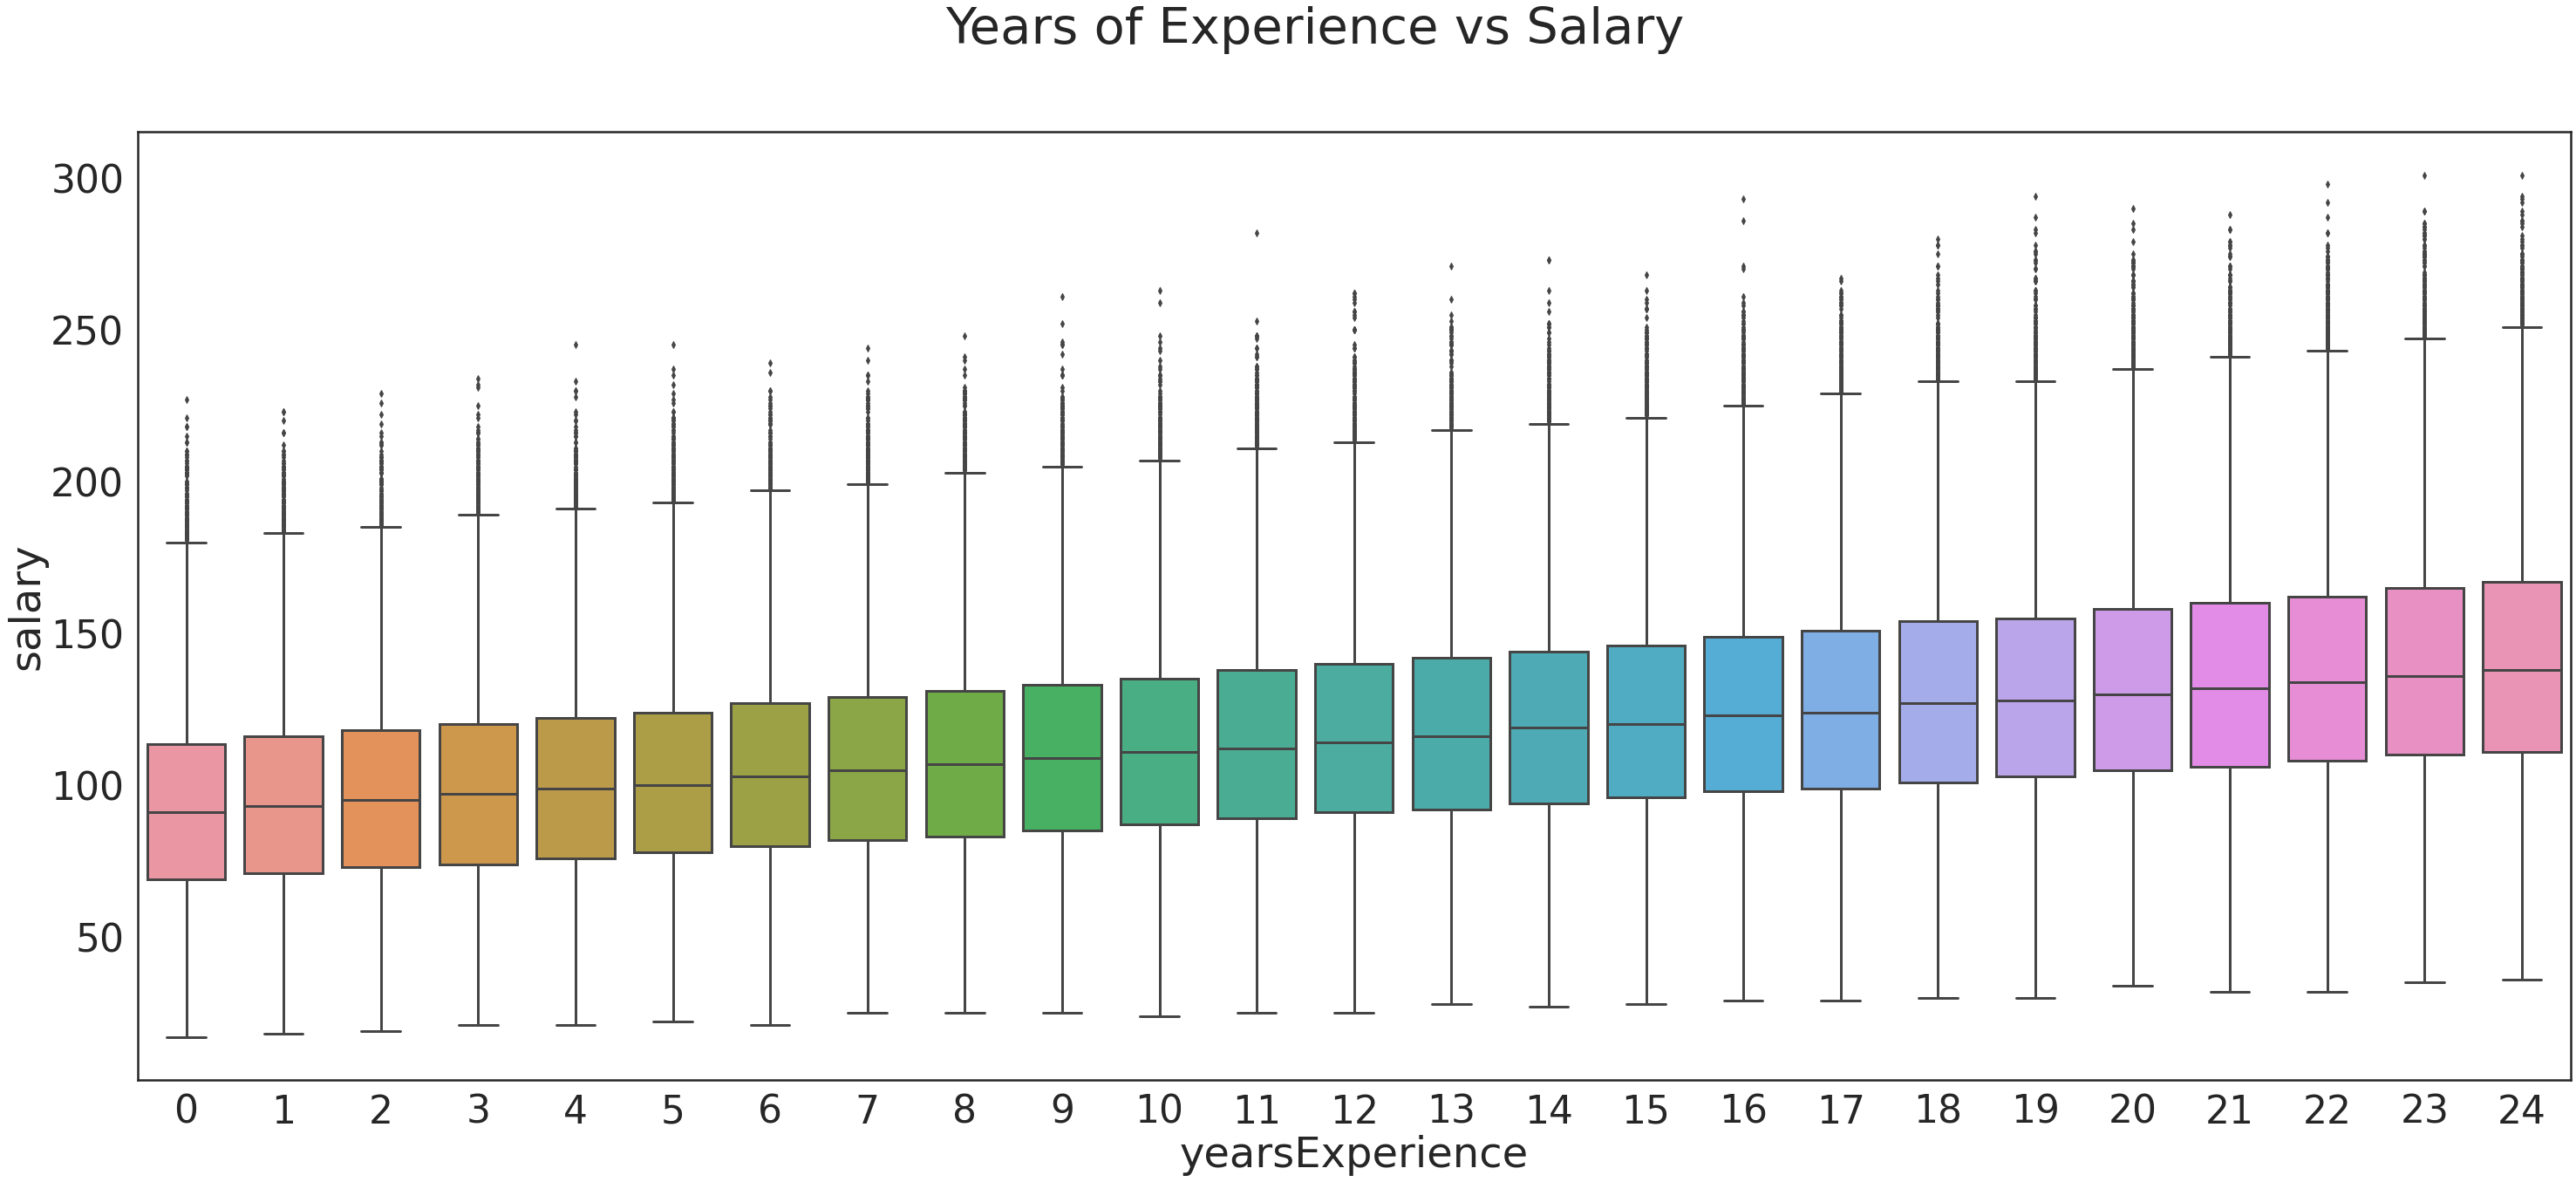

In [47]:
#visualizing years of experience vs salary
plt.figure(figsize = (50, 20)) 
sns.boxplot(x = 'yearsExperience', y = 'salary', data = train_df)
plt.suptitle('Years of Experience vs Salary') 
plt.show()

Salary appears to be positively correlated with years of experience.  As years of experience increases, salary increases slightly

In [ ]:
#visualizing job type vs salary
meanorder = train_df.groupby(by=['jobType'])['salary'].mean().sort_values().index
sns.set_context("paper", font_scale=1)
sns.boxplot(x='jobType', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be positively correlated with job types of advancing career progression

In [ ]:
#visualizing miles from metropolis vs salary
sns.lineplot(x = 'milesFromMetropolis' , y = 'salary', data = train_df)
plt.suptitle('Miles From Metropolis vs Salary') 
plt.show()

Salary appears to be negatively correlated with miles from metropolis of each position.  The further from metropolis, the lower the salary.

In [ ]:
#visualizing degree vs salary
meanorder = train_df.groupby(by=['degree'])['salary'].mean().sort_values().index
sns.set_context("paper", font_scale=1)
sns.boxplot(x='degree', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be positively correlated with degree.  The more advanced the degree, the higher the salary.

In [ ]:
#visualizing major vs salary
meanorder = train_df.groupby(by=['major'])['salary'].mean().sort_values().index
sns.set_context("paper", font_scale=1)
sns.boxplot(x='major', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary does not appear to have a strong correlation with major, with the exception of no major having a slightly lower salary and enginereering having a slightly higher salary

In [ ]:
#visualizing industry vs salary
meanorder = train_df.groupby(by=['industry'])['salary'].mean().sort_values().index
sns.set_context("paper", font_scale=1)
sns.boxplot(x='industry', y='salary', data=train_df, order=meanorder)
plt.xticks(rotation=45)
plt.show()

Salary appears to be slightly correlated with industry.  Some industries earn slightly more than others

In [ ]:
#visualizing between features
#features = list(train_df.columns)
plt.figure(figsize = (50, 50)) 
sns.set_context("poster", font_scale=2)
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(train_df[features + ['salary']].corr(), annot=True)
plt.show()

The feature variables are not very correlated with each other

In [ ]:
You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 5 Establish a baseline ----

In [34]:
#creating simple model to measure efficacy
df_baseline = train_df.groupby('jobType', as_index = False).mean()
df_baseline.rename(columns = {'salary':'avg_salary'}, inplace = True)
df_baseline = df_baseline[['jobType', 'avg_salary']]
df_baseline

,jobType,avg_salary
0,CEO,145.311425
1,CFO,135.458547
2,CTO,135.481067
3,JANITOR,70.813045
4,JUNIOR,95.333087
5,MANAGER,115.368518
6,SENIOR,105.487775
7,VICE_PRESIDENT,125.368630


In [ ]:
#measuring MSE of baseline

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

Cycling through creating features, tuning models, and training / validing models (steps 7-9) until reaching efficacy goal

Metric will be MSE and goal is: <360 for entry-level data science roles

### ---- 7 Engineer features  ----

In [35]:
x = train_df.iloc[:,:-1]

In [36]:
#dropping jobid and company id because no correlation
x = x.drop(columns=['jobId','companyId'])

In [37]:
#getting dummy values for categorical variables 
x = pd.get_dummies(data=x, columns=['jobType' , 'degree' , 'major', 'industry'])

In [38]:
#scaling min max values 
scaler = MinMaxScaler()
x[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(x[['yearsExperience', 'milesFromMetropolis']])

In [ ]:
#creating new features 

In [39]:
x

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,0.416667,0.838384,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0.125000,0.737374,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.416667,0.383838,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.333333,0.171717,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.333333,0.161616,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.791667,0.949495,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
999996,0.500000,0.353535,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
999997,0.666667,0.818182,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
999998,0.250000,0.050505,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [40]:
y = train_df.iloc[:,-1:].values
y

array([[130],
       [101],
       [137],
       ...,
       [ 64],
       [149],
       [ 88]])

In [41]:
#defining train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### ---- 8 Creating models ----

In [15]:
#create and tune the models that you brainstormed during part 2

In [42]:
#creating linear regression object
print('starting...')
lr = linear_model.LinearRegression()

#training the model using the training sets
lr.fit(x_train, y_train)

#making predictions using the testing set
y_pred = lr.predict(x_test)

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

starting...
Mean squared error: 384.92


In [25]:
#creating random forest regressor object
print('starting...')
RFreg = RandomForestRegressor(n_estimators = 100, max_depth = 15, max_features = 15, random_state = 0)
  
#fitting the regressor with x and y data
RFreg.fit(x_train, y_train.ravel())  

#making predictions using the testing set
y_pred = regressor.predict(x_test)  

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 376.19


In [44]:
# getting best hyperparameters
param = {'max_depth': [5, 10, 20, None],
         'learning_rate':[.01, 1.0, 10], 
         'n_estimators':[50, 100, 150], 
         'max_features':[10, 20, 30],
         'min_samples_split': [5, 10, 20]}

In [45]:
rnd_search = RandomizedSearchCV(GradientBoostingRegressor(), param, 
n_iter =10, cv=2)
rnd_search.fit(x,y.ravel())
print(rnd_search.best_params_)
print(rnd_search.best_score_)

KeyboardInterrupt: 

In [ ]:
rnd_search.best_params_

In [ ]:
rnd_search.best_score_

In [ ]:
#creating gradient boosting regressor object
GBreg = GradientBoostingRegressor(learning_rate = 1, max_depth = 5, max_features = 30, min_samples_split = 10, n_estimators = 150, random_state = 0)

#fitting the regressor with x and y data
GBreg.fit(x_train, y_train.ravel())

#making predictions using the testing set
y_pred = reg.predict(x_test)

#getting Mean Squared Error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [ ]:
from sklearn.cross_validation import cross_val_score 
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=Y_train, cv=12, n_jobs=)
mean_scores = scores.mean()

In [14]:
cvlr = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')
mselr = np.average(cvlr)
print(mselr)

-384.49516949432666


In [24]:
cvrf = cross_val_score(RFreg, x, y.ravel(), cv=5, scoring='neg_mean_squared_error')
mserf = np.average(cvrf)
print(mserf)

array([-453.89056486, -453.6485728 , -455.30029597, -451.57639736,
       -452.19440379])

In [ ]:
cvgb = cross_val_score(reg, x, y.ravel(), cv=5, scoring='neg_mean_squared_error')
msegb = np.average(cvgb) 
print(msegb)

### ---- 10 Select best model  ----

In [29]:
MSEdf = pd.DataFrame(columns = ['Model', 'MSE'])
MSEdf

,Model,MSE


In [37]:
MSEdf.loc[len(MSEdf.index)] = ['LR', mselr] 
MSEdf

,Model,MSE
0,LR,-384.495169


In [38]:
MSEdf.loc[len(MSEdf.index)] = ['RFreg', mserf]
MSEdf

NameError: name 'mserf' is not defined

In [ ]:
MSEdf.loc[len(MSEdf.index)] = ['GBreg', msegb]
MSEdf

In [39]:
MSEdf.min()

Model            LR
MSE     -384.495169
dtype: object

## Part 4 - DEPLOY

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [ ]:
#preparing test features
test_features.info()

In [ ]:
test_features.head()

In [ ]:
#dropping unneeded columns
test_features = test_features.drop(columns=['jobId','companyId'])
test_features.head()

In [ ]:
#converting categorical columns
test_features = pd.get_dummies(data=test_features, columns=['jobType' , 'degree' , 'major', 'industry'])
test_features.head()

In [ ]:
#scaling numerical columns 
test_features[['yearsExperience', 'milesFromMetropolis']] = scaler.fit_transform(test_features[['yearsExperience', 'milesFromMetropolis']])

In [ ]:
test_features.head()

In [ ]:
#predicting based on test set
y_predtest = reg.predict(test_features)

In [ ]:
#saving prediction to csv
y_predtest = pd.DataFrame(y_predtest, columns=['predictions']).to_csv('prediction.csv')

In [ ]:
predictions = pd.read_csv('prediction.csv')
predictions

In [ ]:
#visualization of predictions 
plt.plot(predictions.predictions)
#sns.boxplot(x = 'yearsExperience', y = 'salary', data = train_df)
plt.show()

In [ ]:
#getting feature importances
col_sorted_by_importance=np.flip(reg.feature_importances_.argsort())
feat_imp=pd.DataFrame({
    'cols':x.columns[col_sorted_by_importance],
    'imps':reg.feature_importances_[col_sorted_by_importance]
})

plt.plot('cols','imps', data=feat_imp)
plt.show

In [ ]:
#visualizing feature importances
sns.set_context("poster", font_scale=2)
plt.figure(figsize = (50, 20)) 
sns.barplot(x = 'cols', y = 'imps', data = feat_imp)
plt.xticks(rotation=90)
plt.show()

### ---- 11 Automate pipeline ----

In [ ]:
#importance = reg.feature_importances_
#importance
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data